In [1]:
import os
import random
import copy
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
import fix_yahoo_finance as yf
import numpy as np
from numpy import std
from statistics import stdev
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Significado das entradas da função 'leitura': leitura padrão
# diretorio: digitar entre aspas o diretório em que os dados históricos estão hospedados. Exemplo:'/home/giovana/Área de Trabalho/Implementações/Projeto/Dados/sITE/MGLU3.SA.csv'
# Chamando a função:
# leitura('/home/giovana/Área de Trabalho/Implementações/Projeto/Dados/sITE/MGLU3.SA.csv')

def leitura(diretorio):
    serie = pd.read_csv(diretorio)
    return serie

# Para visualizar um número especícico de linhas, defina uma variável como a função 'leitura' e aplique o método '.head()'
# Exemplo:
# >>> x = leitura('/home/giovana/Área de Trabalho/Implementações/Projeto/Dados/sITE/MGLU3.SA.csv')
# >>> x.head(15)

# __Recomendação:__ 

Defina uma variável como a função 'leitura' para acessar as demais funções. Neste notebook, consira-se a variável 'dados'.

In [4]:
dados = leitura('/home/giovana/Área de Trabalho/Implementações/Projeto/Dados/sITE/MGLU3.SA.csv')
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-03,0.515625,0.521562,0.506250,0.509375,0.459283,33670400.0
1,2011-05-04,0.510000,0.515000,0.510000,0.515000,0.464355,39203200.0
2,2011-05-05,0.512812,0.512812,0.510000,0.511875,0.461537,35097600.0
3,2011-05-06,0.510937,0.511875,0.500000,0.508125,0.458156,38672000.0
4,2011-05-09,0.506562,0.507812,0.501250,0.503125,0.453647,667680.0
...,...,...,...,...,...,...,...
2374,2020-11-23,24.299999,24.370001,23.219999,23.420000,23.395634,59639700.0
2375,2020-11-24,23.370001,23.969999,22.900000,23.700001,23.675343,57465100.0
2376,2020-11-25,23.670000,24.309999,23.520000,24.000000,23.975031,38914800.0
2377,2020-11-26,23.900000,24.299999,23.820000,24.250000,24.224770,23108700.0


In [5]:
petr4 = leitura('/home/giovana/Área de Trabalho/Implementações/Projeto/Dados/sITE/PETR4.SA.csv')
itub4 = leitura('/home/giovana/Área de Trabalho/Implementações/Projeto/Dados/sITE/ITUB4.SA.csv')
mglu3 = leitura('/home/giovana/Área de Trabalho/Implementações/Projeto/Dados/sITE/MGLU3.SA.csv')

In [7]:
# Significado das entradas da função 'removendo_valores_discrepantes': remover as linhas que apresentem como valores '0', 'Nan' ou 'null'
# dados_historicos: recomenda-se definir a função leitura como uma variável que pode ser interpretada como parâmetro. Um exemplo é a variável 'dados'.
# Chamando a função:
# removendo_volume_zerado(dados)

def removendo_valores_discrepantes(dados_historicos):
    dados_historicos = dados_historicos[dados_historicos['Volume']>0]
    return dados_historicos

In [146]:
dados_sem_valores_discrepantes = removendo_valores_discrepantes(dados)
dados_sem_valores_discrepantes

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-03,0.515625,0.521562,0.506250,0.509375,0.459283,33670400.0
1,2011-05-04,0.510000,0.515000,0.510000,0.515000,0.464355,39203200.0
2,2011-05-05,0.512812,0.512812,0.510000,0.511875,0.461537,35097600.0
3,2011-05-06,0.510937,0.511875,0.500000,0.508125,0.458156,38672000.0
4,2011-05-09,0.506562,0.507812,0.501250,0.503125,0.453647,667680.0
...,...,...,...,...,...,...,...
2374,2020-11-23,24.299999,24.370001,23.219999,23.420000,23.395634,59639700.0
2375,2020-11-24,23.370001,23.969999,22.900000,23.700001,23.675343,57465100.0
2376,2020-11-25,23.670000,24.309999,23.520000,24.000000,23.975031,38914800.0
2377,2020-11-26,23.900000,24.299999,23.820000,24.250000,24.224770,23108700.0


In [147]:
def removendo_dados_duplicados(dados_historicos):
    dados_historicos = dados_historicos.drop_duplicates()
    return dados_historicos

In [148]:
dados_nao_duplicados = removendo_dados_duplicados(dados_sem_valores_discrepantes)
dados_nao_duplicados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-05-03,0.515625,0.521562,0.506250,0.509375,0.459283,33670400.0
1,2011-05-04,0.510000,0.515000,0.510000,0.515000,0.464355,39203200.0
2,2011-05-05,0.512812,0.512812,0.510000,0.511875,0.461537,35097600.0
3,2011-05-06,0.510937,0.511875,0.500000,0.508125,0.458156,38672000.0
4,2011-05-09,0.506562,0.507812,0.501250,0.503125,0.453647,667680.0
...,...,...,...,...,...,...,...
2374,2020-11-23,24.299999,24.370001,23.219999,23.420000,23.395634,59639700.0
2375,2020-11-24,23.370001,23.969999,22.900000,23.700001,23.675343,57465100.0
2376,2020-11-25,23.670000,24.309999,23.520000,24.000000,23.975031,38914800.0
2377,2020-11-26,23.900000,24.299999,23.820000,24.250000,24.224770,23108700.0


In [149]:
def remover_coluna_date(dados_historicos):
    dados_sem_data = dados_historicos.drop(columns=['Date'])
    return dados_sem_data

In [150]:
dados_para_normalizar = remover_coluna_date(dados_nao_duplicados)
dados_para_normalizar

,Open,High,Low,Close,Adj Close,Volume
0,0.515625,0.521562,0.506250,0.509375,0.459283,33670400.0
1,0.510000,0.515000,0.510000,0.515000,0.464355,39203200.0
2,0.512812,0.512812,0.510000,0.511875,0.461537,35097600.0
3,0.510937,0.511875,0.500000,0.508125,0.458156,38672000.0
4,0.506562,0.507812,0.501250,0.503125,0.453647,667680.0
...,...,...,...,...,...,...
2374,24.299999,24.370001,23.219999,23.420000,23.395634,59639700.0
2375,23.370001,23.969999,22.900000,23.700001,23.675343,57465100.0
2376,23.670000,24.309999,23.520000,24.000000,23.975031,38914800.0
2377,23.900000,24.299999,23.820000,24.250000,24.224770,23108700.0


In [222]:
media = remover_coluna_date(dados_nao_duplicados)

0.515

In [245]:
(media['Close']>1).astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
2374    1
2375    1
2376    1
2377    1
2378    1
Name: Close, Length: 2354, dtype: int64

# Gerando os indicadores técnicos

- __Médias móveis:__ suaviza os preços anteriores para identificar a movimentação dos preços.
    - Média móvel(simples e exponencial).
- __Tendência:__ indica pontos de reversão de tendência.
    - MACD.
- __Momento:__ acompanha a taxa de variação dos preços.
    - IFR.
- __Volatilidade:__ identifica se as variações de preço futuras estão seguindo o mesmo ritmo das variações passadas.
    - Bandas de Bollinger.
- __Volume:__ determina se a tendência é relevante.
    - Osciladores de Chaikin

## Média móvel simples (MMS)

In [246]:
def MMS(dados_historicos, periodo):
    #Criando uma janela dos elementos considerados:
    janela = dados_historicos['Close'].rolling(window= periodo, center = True)#Decidir se será centrado
    #Calculando a média da janela:
    media_movel = janela.mean()
    #Inserindo a coluna Média Móvel Simples no conjunto de dados:
    dados_historicos['MMS'] = media_movel
    return dados_historicos

def Class_MMS(dados_historicos):
    dif = dados_historicos['Close'].values[1:]-dados_historicos['Close'].values[:-1]
    dif = np.concatenate([[np.nan], dif])
    dados_historicos['DIF_MMS']= dif

    dados_historicos['ClasseMMS']= (dados_historicos['DIF_MMS']>0).astype(int)
    return dados_historicos
    


In [247]:
media = MMS(dados_para_normalizar,10)
media = Class_MMS(media)
media

,Open,High,Low,Close,Adj Close,Volume,MMS,DIF_MMS,ClasseMMS,DIF,ClasseMME,MME,MME26,MME12,MACD
0,0.515625,0.521562,0.506250,0.509375,0.459283,33670400.0,NaN,NaN,0,-0.006250,0,0.509375,0.509375,0.509375,0.000000
1,0.510000,0.515000,0.510000,0.515000,0.464355,39203200.0,NaN,0.005625,1,0.005000,1,0.512469,0.512296,0.512422,0.000126
2,0.512812,0.512812,0.510000,0.511875,0.461537,35097600.0,NaN,-0.003125,0,-0.000937,0,0.512230,0.512145,0.512208,0.000064
3,0.510937,0.511875,0.500000,0.508125,0.458156,38672000.0,NaN,-0.003750,0,-0.002812,0,0.510878,0.511021,0.510919,-0.000101
4,0.506562,0.507812,0.501250,0.503125,0.453647,667680.0,NaN,-0.005000,0,-0.003437,0,0.508652,0.509190,0.508802,-0.000388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,24.299999,24.370001,23.219999,23.420000,23.395634,59639700.0,24.342,-1.219999,0,-0.879999,0,24.810309,24.924201,24.906175,-0.018026
2375,23.370001,23.969999,22.900000,23.700001,23.675343,57465100.0,NaN,0.280001,1,0.330000,1,24.608435,24.833520,24.720610,-0.112910
2376,23.670000,24.309999,23.520000,24.000000,23.975031,38914800.0,NaN,0.299999,1,0.330000,1,24.497810,24.771778,24.609747,-0.162031
2377,23.900000,24.299999,23.820000,24.250000,24.224770,23108700.0,NaN,0.250000,1,0.350000,1,24.452754,24.733127,24.554401,-0.178726


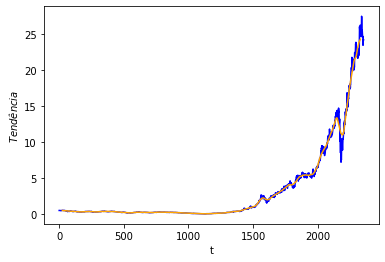

In [17]:
plt.plot(range(1, 2355), media['Close'], color = 'blue')
plt.plot(range(1, 2355), media['MMS'], color = 'orange')
plt.xlabel('t')
plt.ylabel('$Tendência$')
plt.show()

## Média móvel exponencial (MME)

In [204]:
def MME(dados_historicos, periodo, inicio_do_cálculo):
    mme = dados_historicos['Close'].ewm(span = periodo, min_periods = inicio_do_cálculo, adjust = True).mean()
    dados_historicos['MME'] = mme
    return dados_historicos

def Class_MME(dados_historicos):
    for i in range(len(dados_historicos)+1):
        dif[i] = dados_historicos['MME'][i] - dados_historicos['MME'][i-1]
        dados_historicos['DIF_MME'] = dif[i]
        ClasseMME=[]
        for element in dados_historicos['DIF_MME']:
            if element>0:
                element = 1
                ClasseMME.append(element)
            else:
                element = 0
                ClasseMME.append(element)
        dados_historicos['ClasseMME']=ClasseMME
    return dados_historicos
    

In [205]:
media = MME(media, 10, 0)
media = Class_MME(media)
media.head(60)

KeyError: -1

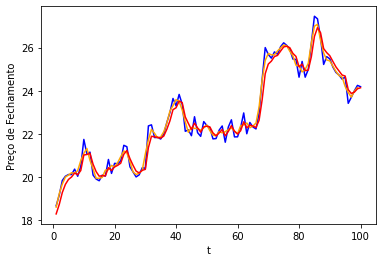

In [58]:
plt.plot(range(1,101), media['Close'].tail(100), color = 'blue')
plt.plot(range(1, 101), media['MMS'].tail(100), color = 'orange')
plt.plot(range(1, 101), media['MME'].tail(100), color = 'red')
plt.xlabel('t')
plt.ylabel('Preço de Fechamento')
plt.show()

## Convegência / divergência das médias móveis (MACD)

In [216]:
def MACD (dados_historicos):
    #parâmetros da linha macd
    mme26 = dados_historicos['Close'].ewm(span = 26, min_periods = 0, adjust = True).mean()
    dados_historicos['MME26']=mme26
    mme12 = dados_historicos['Close'].ewm(span = 12, min_periods = 0, adjust = True).mean()
    dados_historicos['MME12']=mme12
    #linha macd
    macd = dados_historicos['MME12'] - dados_historicos['MME26']
    dados_historicos['MACD'] = macd
    #linha de sinal: mme(9)
    #mme9 = dados_historicos['Close'].ewm(span = 9, min_periods = 0, adjust = True).mean()
    #dados_historicos['MME9']=mme9
    return dados_historicos

def classe_MACD(dados_historicos):
    classe_macd = []
    for element in dados_historicos['MACD']:
        if element<0:
            classe_macd=0
            classe_macd.append(element)
        else:
            classe_macd=1
            classe_macd.append(element)
    dados_historicos['ClasseMACD'] = classe_macd
    return dados_historicos


In [218]:
media = MACD(media)
media = classe_MACD(media)
media.head(50)

AttributeError: 'int' object has no attribute 'append'

In [215]:
classe_MACD(media)


AttributeError: 'int' object has no attribute 'append'

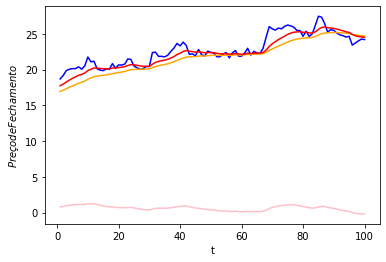

In [98]:
plt.plot(range(1,101), media['Close'].tail(100), color = 'blue')
plt.plot(range(1, 101), media['MME26'].tail(100), color = 'orange')
plt.plot(range(1, 101), media['MME12'].tail(100), color = 'red')
plt.plot(range(1, 101), media['MACD'].tail(100), color = 'pink')
#plt.plot(range(1, 101), media['MME9'].tail(100), color = 'green')
plt.xlabel('t')
plt.ylabel('$Preço de Fechamento$')
plt.show()

# Volatilidade: 

Determinar se as oscilações estão controladas

## Bandas de Bollinger

__Padrão:__

- Banda Superior = Média Móvel Simples (20 dias) + (2 x Desvio Padrão de 20 dias)
- Banda Inferior = Média Móvel Simples (20 dias) – (2 x Desvio Padrão de 20 dias)

__Adaptações:__

- Longo Prazo: usar 2.1 desvios padrões com 50 períodos
- Curto Prazo: usar 1.9 desvios padrões com 10 períodos.


In [45]:
def Bollinger(dados_historicos, numero_de_desvios_padroes, periodo):
    #Criando uma janela:
    janela = dados_historicos['Close'].rolling(window= periodo, center = True)#Decidir se será centrado
    #Calculando a média da janela:
    media_movel = janela.mean()
    
    # Calculando o desvio:
    dp = dados_historicos['Close'].rolling(window = periodo, center = False).std()
    
    #Calculando a banda:
    banda_sup = media_movel + numero_de_desvios_padroes*dp
    banda_inf = media_movel - numero_de_desvios_padroes*dp
    
    dados_historicos['BSuperior'] = banda_sup
    dados_historicos['BInferior'] = banda_inf
    
    return dados_historicos    

In [49]:
Bollinger(media, 2.1,50)

,Open,High,Low,Close,Adj Close,Volume,MMS,MME,MME26,MME12,MACD,BSuperior,BInferior
0,0.515625,0.521562,0.506250,0.509375,0.459283,33670400.0,NaN,NaN,0.509375,0.509375,0.000000,NaN,NaN
1,0.510000,0.515000,0.510000,0.515000,0.464355,39203200.0,0.512083,NaN,0.512296,0.512422,0.000126,NaN,NaN
2,0.512812,0.512812,0.510000,0.511875,0.461537,35097600.0,0.511667,NaN,0.512145,0.512208,0.000064,NaN,NaN
3,0.510937,0.511875,0.500000,0.508125,0.458156,38672000.0,0.507708,NaN,0.511021,0.510919,-0.000101,NaN,NaN
4,0.506562,0.507812,0.501250,0.503125,0.453647,667680.0,0.507917,NaN,0.509190,0.508802,-0.000388,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,24.299999,24.370001,23.219999,23.420000,23.395634,59639700.0,23.920000,24.831623,24.924201,24.906175,-0.018026,NaN,NaN
2375,23.370001,23.969999,22.900000,23.700001,23.675343,57465100.0,23.706667,24.758615,24.833520,24.720610,-0.112910,NaN,NaN
2376,23.670000,24.309999,23.520000,24.000000,23.975031,38914800.0,23.983334,24.709672,24.771778,24.609747,-0.162031,NaN,NaN
2377,23.900000,24.299999,23.820000,24.250000,24.224770,23108700.0,24.146667,24.680016,24.733127,24.554401,-0.178726,NaN,NaN


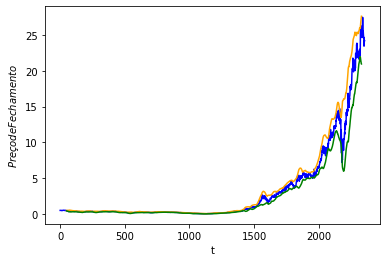

In [50]:
plt.plot(range(1,2355), media['Close'], color = 'blue')
plt.plot(range(1, 2355), media['BSuperior'], color = 'orange')
plt.plot(range(1, 2355), media['BInferior'], color = 'green')
plt.xlabel('t')
plt.ylabel('$Preço de Fechamento$')
plt.show()

In [10]:
def normalizar(dados_historicos):
    dados_historicos = MinMaxScaler(feature_range=(0, 1)).fit_transform(dados_historicos)
    return dados_historicos

In [13]:
normalizar(dados_para_normalizar)

array([[0.01721923, 0.01732091, 0.01781606, 0.01746171, 0.01570044,
        0.0781092 ],
       [0.01701919, 0.01708886, 0.01795646, 0.01766686, 0.0158856 ,
        0.09096384],
       [0.01711919, 0.01701149, 0.01795646, 0.01755289, 0.01578272,
        0.08142509],
       ...,
       [0.8406746 , 0.85854849, 0.87944414, 0.87417671, 0.87418289,
        0.09029378],
       [0.84885425, 0.85819486, 0.89067605, 0.88329434, 0.88330004,
        0.05357067],
       [0.86379101, 0.86703558, 0.89442002, 0.88110615, 0.88111194,
        0.08381349]])